<a href="https://colab.research.google.com/github/RahulJuluru2/unit3assignments/blob/main/U3W15_31_Time_Series_ARIMA_Air_Passengers_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives

At the end of the experiment, you will be able to:

* perform Time Series Analysis and ARIMA Forecasting model for the prediction of the number of Airline Passengers

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="400" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/11_dec_2020_experiment_walkthrough.mp4" type="video/mp4">
</video>
""")

### Dataset

#### Description

The dataset chosen for this experiment is  AirPassengers. This dataset provides monthly totals of a US airline passengers from 1949 to 1960. 

**Task Flow:**

Observation of trends, seasonality and noise

Making a Time Series Stationary

Forecasting Modeling -ARIMA

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U3W15_31_Time_Series_ARIMA_Air_Passengers_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/AirPassengers.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required Packages 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

### Load the Data

In [ ]:
# Read the AirPassengers dataset 
data = pd.read_csv('AirPassengers.csv',  parse_dates = True) 

In [ ]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Convert Month object into datetime
data['Month'] = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
df = data.sort_index(axis=0)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Before applying the model let us identify the trends and seasonality from the given time series data


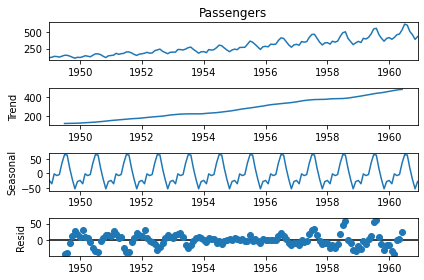

In [ ]:
# The statsmodels library provides a suite of functions for working with time series data
from statsmodels.tsa.seasonal import seasonal_decompose 

ts = data['Passengers']

# ETS Decomposition 
result = seasonal_decompose(ts) 

# ETS plot 
result.plot();

The seasonal decompose method broke down the data into three parts: trend, 
seasonality and residual components.

**Trend** – varying mean over time. **For eg.** the number of passengers is seen to be growing over time.

**Seasonality** – variations in specific time-frames. **For eg.** people may travel more in specific months owing to holidays/festivals.

**Residual Component (noise)** - We can see from the plot that there appears to be randomness in the data.

We can also perform Rolling Statistics to ensure whether the time series is stationary or not.

**Rolling Statistics:** Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time

In [ ]:
# Let’s create a function to run the test which determines whether a given time series is stationary
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

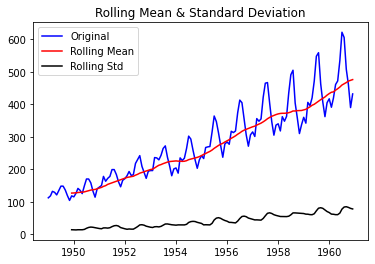

In [ ]:
get_stationarity(df)

As you can see, the rolling mean and rolling standard deviation increase with time. ***Therefore, it can be inferrred that the time series is not stationary.***

###Making the time series stationary
Stationarity is important because many useful analytical tools and statistical tests and models rely on it

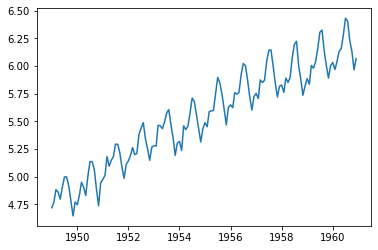

In [ ]:
# ESTIMATING THE TREND
# Applying a log transformation is a way to reduce the variance of the series
df_log = np.log(df)
plt.plot(df_log);

Eliminating the Trend and Seasonality by **Differencing** (taking the difference with a particular time lag)

In [ ]:
shift_df = pd.concat([df_log, df_log.shift(1)],axis=1)
shift_df.columns = ['Actual_Passengers','Forecasted_Passengers']
shift_df.head()

,Actual_Passengers,Forecasted_Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,4.718499
1949-03-01,4.882802,4.770685
1949-04-01,4.859812,4.882802
1949-05-01,4.795791,4.859812


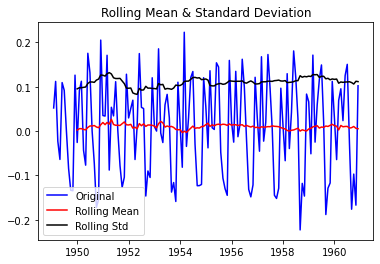

In [ ]:
# Taking the difference with a particular time lag
# We create a lagged copy of the data by subtracting the every previous data point from the current data point
df_log_shift = shift_df['Actual_Passengers'] - shift_df['Forecasted_Passengers']
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

You can see that the mean and standard deviation are approximately horizontal. We can also take second or third order differences which might get even better results in certain applications. However, it is still more stationary than the original.

In [ ]:
# Splitting the data into train and test sets
train_data, test_data = df_log[0:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
train_data.size, test_data.size

(115, 29)

Let us now apply the **ARIMA model (Autoregressive {p} Integrated {d} Moving Average {q}).** The model has 3 parameters

**p** - the parameter associated with the `Auto-Regressive part` of the ARIMA model. You can use the **PACF** (partial autocorrelation function) plot to find the optimal p value.

**d** - the parameter associated with the `Integration part` of the ARIMA model. This is the **order of difference**, or the number of times the time series is differenced in order to stationarize the series.

**q** - the parameter associated with the `Moving Average part` of the ARIMA model. You can use the **ACF** (autocorrelation function) plot to find the optimal q value.


These functions plot **lags** on the horizontal axis and the **correlations** on the vertical axis.


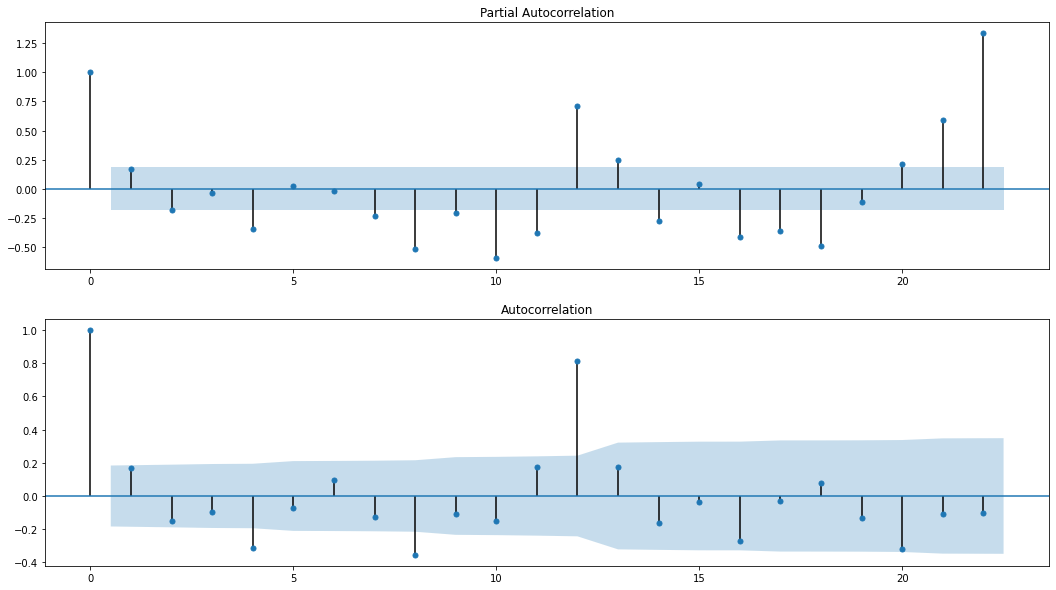

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf describes how well the present value of the series is related with its past values
# pacf finds correlation of the residuals of the current with the next lag value
trainData_diff = train_data.diff().dropna()
fig, ax = plt.subplots(2,1, figsize =(18, 10)) 
fig = plot_pacf(trainData_diff, lags=22, ax=ax[0])
fig = plot_acf(trainData_diff, lags=22, ax=ax[1]) 
plt.show()

AR model: The PACF plot finds the correlation with the residual (error) i.e. the component not explained by earlier lags.

    Order p is the lag value after which PACF plot crosses the upper confidence interval for the first time

MA model: The ACF plot finds the correlation of the current values with its lagged values

    Order q is the lag value after which ACF crosses the upper confidence interval for the first time.

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# ARIMA model
train_ar = train_data['Passengers'].values
test_ar = test_data['Passengers'].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,1))
    # (1, 1, 1) indicates a lag value of 1 for autoregression, a difference order of 1 to make the time series stationary and a moving average model of 1.   
    model_fit = model.fit()        
    output = model_fit.forecast() # one-step forecast    
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

error = sqrt(mean_squared_error(test_ar, predictions))
print('RMSE value: %.3f' % error)

RMSE value: 0.115


### Plot the predictions

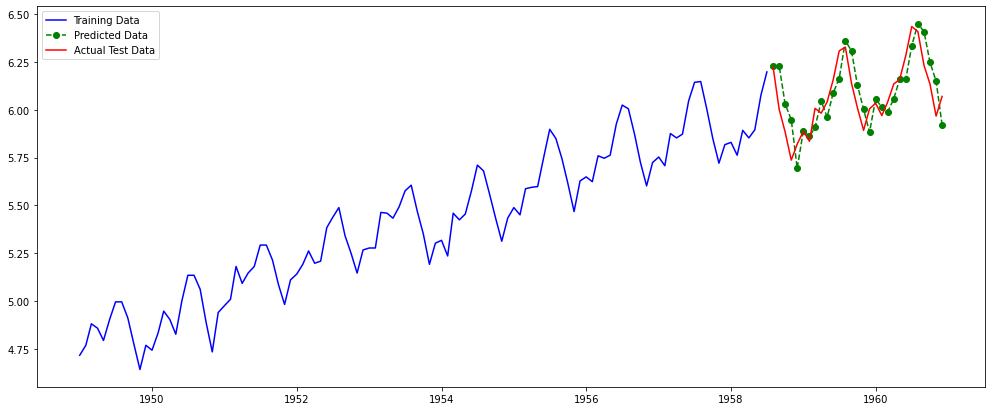

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train_data['Passengers'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Data')
plt.plot(test_data.index, test_data['Passengers'], color='red', label='Actual Test Data')
plt.legend();

**References for Further Reading:**

[ACF and PACF plots](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8#:~:text=ACF%20is%20an%20(complete)%20auto,related%20with%20its%20past%20values)

[ARIMA model](https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7)




# Please answer the questions below to complete the experiment:

In [ ]:
#@title State True or False: A time series is called as stationary if the properties such as mean and standard deviation does not vary with time
Answer = "TRUE" #@param ["","TRUE","FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Difficult for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Understanding ARIMA concept was not easy." #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2518
Date of submission:  20 Aug 2022
Time of submission:  15:08:57
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
